In [1]:
import numpy as np
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt

###  Get the x y z cartesian coordinates for the vertices

In [2]:
xyz = np.loadtxt("pocket-vertices.dat")
xyz = xyz

### Plot the raw data

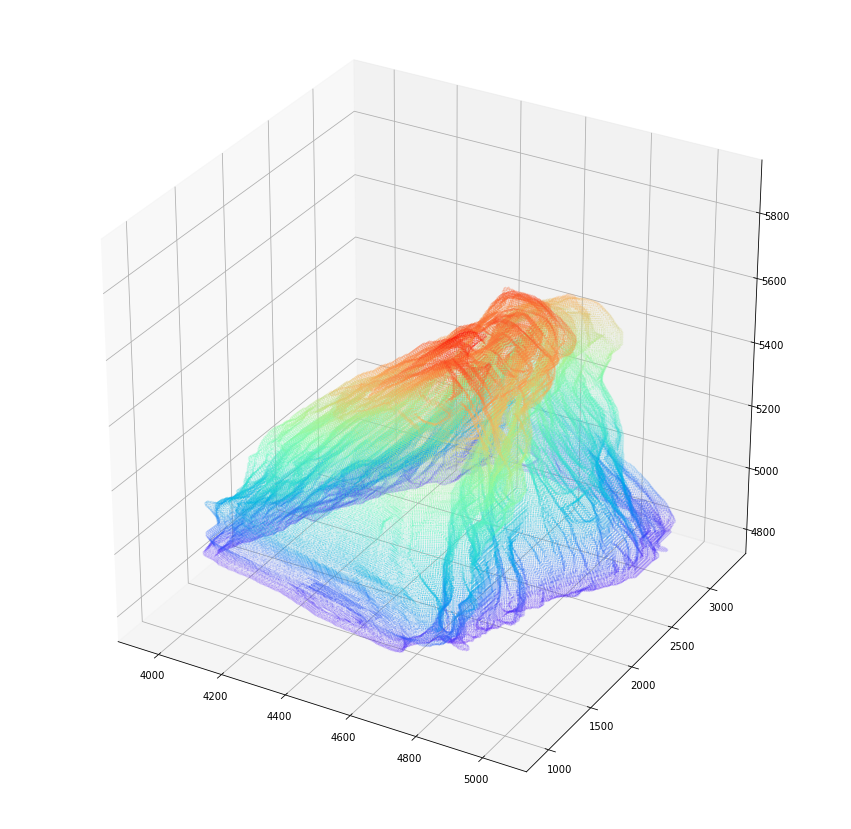

In [3]:
plt.figure(figsize=(15,15))
ax = plt.axes(projection='3d')
ax.scatter3D(xyz[:,0], xyz[:,1], xyz[:,2], c=xyz[:,2], cmap='rainbow',s=0.01)


### Shift the pocket and flip it around z

In [4]:
for i in range(0,3):
    xyz[:,i] = xyz[:,i] - np.amin(xyz[:,i])

In [5]:
xyz[:,2] = xyz[:,2]*-1
xyz[:,2] = xyz[:,2] - np.amin(xyz[:,2])

In [6]:
print(np.amin(xyz[:,0]),np.amin(xyz[:,1]),np.amin(xyz[:,2]))
print(np.amax(xyz[:,0]),np.amax(xyz[:,1]),np.amax(xyz[:,2]))
print(np.amax(xyz[:,0])-np.amin(xyz[:,0]),np.amax(xyz[:,1])-np.amin(xyz[:,1]),np.amax(xyz[:,2])-np.amin(xyz[:,2]))

0.0 0.0 0.0
1099.4499999999998 2379.08 1081.8199999999997
1099.4499999999998 2379.08 1081.8199999999997


### Replot... now that looks better

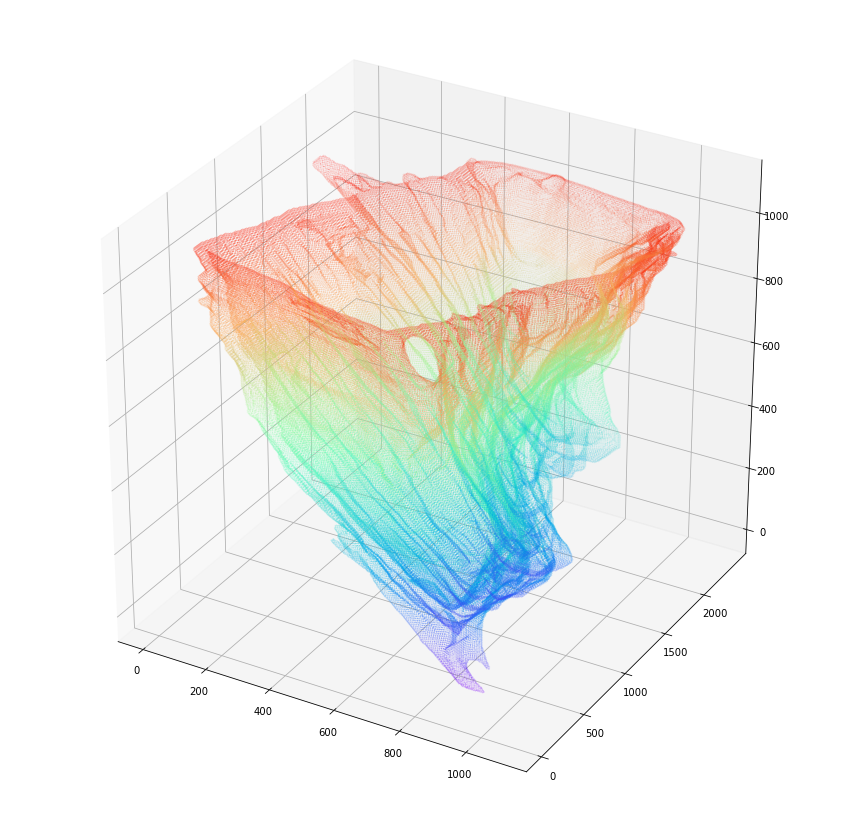

In [7]:
plt.figure(figsize=(15,15))
ax = plt.axes(projection='3d')
ax.scatter3D(xyz[:,0], xyz[:,1], xyz[:,2], c=xyz[:,2], cmap='rainbow',s=0.01)

### Find the coordinates for the minimum

In [8]:
ind = np.flatnonzero(xyz[:,2] == np.amin(xyz[:,2]))
for i in range(0,len(ind)):
    print(xyz[ind[i],:])

[929.91 180.29   0.  ]
[924.71 185.49   0.  ]
[929.91 185.49   0.  ]
[935.11 185.49   0.  ]
[929.91 190.69   0.  ]
[935.11 190.69   0.  ]


### Generate and align the lattice

In [9]:
lattice_space_og = 9.28313 # simple cubic lattice spacing
lattice_scaling = 5
lattice_space = lattice_space_og*lattice_scaling

In [10]:
lattice_ind = xyz/lattice_space 
lattice_ind = lattice_ind.astype(int) # integer elements for the population of building blocks

In [11]:
lattice = (np.unique(lattice_ind,axis=0)+0)*lattice_space
print(lattice.shape)

(5625, 3)


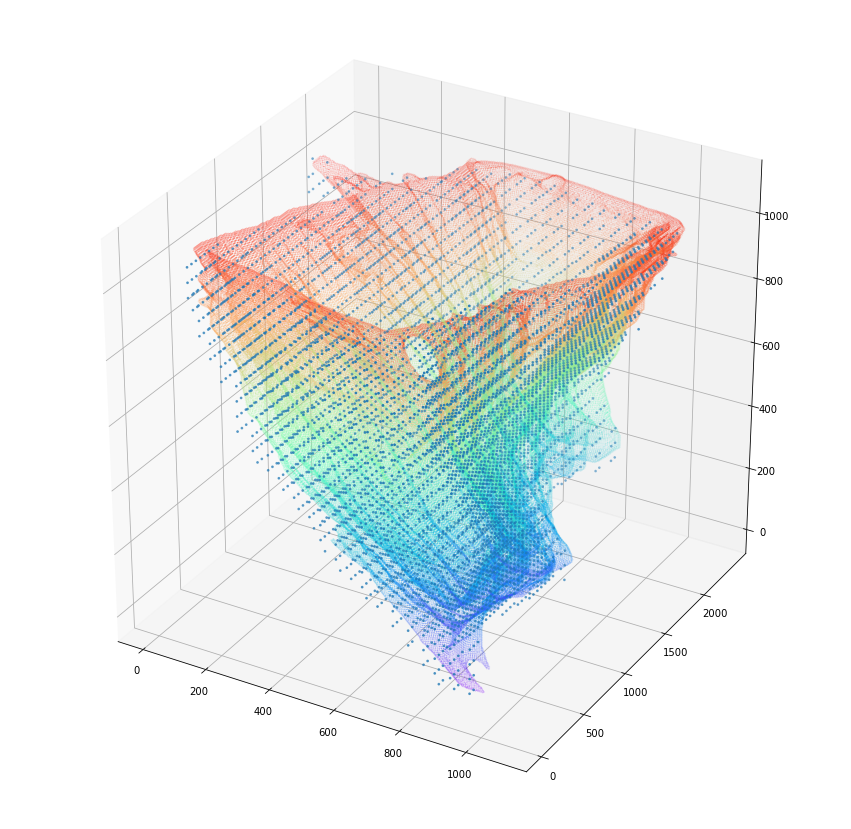

In [12]:
plt.figure(figsize=(15,15))
ax = plt.axes(projection='3d')
ax.scatter3D(xyz[:,0], xyz[:,1], xyz[:,2], c=xyz[:,2], cmap='rainbow',s=0.01)
ax.scatter3D(lattice[:,0], lattice[:,1], lattice[:,2],s=3)

### Output the lattice

In [13]:
lattice = lattice/lattice_scaling
np.savetxt('pocket-vertices-out.dat',xyz)
np.savetxt('lattice-out.dat',lattice)